# Investigação de dados

## DataSet: _Não comparecimento as consultas médicas_

Esta base de dados possui informações de 100.000 consultas médicas no Brasil e está focado na questão de buscar compreender se o paciente irá ou não comparecer a consulta. As características sobre os pacientes são descritas em cada linha.

<li>**ScheduledDay:** informa o dia em que o paciente marcou sua consulta.
<li>**Neighborhood:** indica a localização do hospital.
<li>**Scholarship:** indica se o paciente está ou não envolvido com o programa Bolsa Família.
Tenha cuidado ao interpretar a última coluna. **'No'** significa que o paciente compareceu a consulta previamente agendada. Por outro lado, **'Yes'** signifca que ele não compareceu.

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Perguntas

**1)** Quem mais falta as consultas homens ou mulheres?<br>
**2)** Qual a proporção de pacientes que não comparecem às consultas?<br>
**3)** Qual a distribuição da idade de pacientes que não comparecem às consultas?<br>
**4)** Há alguma relação entre doença e não comparecimento às consultas?<br>
**5)** Qual a cidade com maior número de não comparecimentos?<br>
**6)** Qual é o mês, dia da semana e dia do mês com maior número de não comparecimentos?<br>
**7)** Há alguma correlação entre a participação no programa social Bolsa Família e os comparecimentos?

## Carregar os dados:


In [142]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
#dtype={'AppointmentDay': str}
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv');

df.head()
#df.dtypes

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# **1)** Quem mais falta as consultas homens ou mulheres?

In [4]:
df.groupby(["Gender", "No-show"]).size()



Gender  No-show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
dtype: int64

Conclusão: Com um total de 14.594(mulheres) e 7725(homens) podemos afirmar que as mulheres faltam mais que os homens ás consultas médicas. 




# **2.** Qual a proporção de pacientes que não comparecem às consultas? 


Levando em consideração a questão anterior, temos que 14.594 mulheres faltaram as consultas 
e  7725 homens  que  também faltaram, o que corresponde 22319 faltas as consultas,  o todo 
de quantidade de consultas é corresponde á 110527, dividindo o numero de consultas agendadas pelo numero de consultas faltadas, temos a proporção de 110527/22319, aplicando um simples regra de 3, onde 110527 corresponde ao todo (100%), e 22319  um numero que não conhecemos, temos que 22319 corresponde a cerca 20% das consultas,ou seja, proporcional a 0.20 das consultas marcadas foram faltadas. 


# 3.Qual a distribuição da idade de pacientes que não comparecem às consultas?

Vamos criar um novo dataframe para trabalhar somente com os dados relativos a pacientes 
que não compareceram as consultas 

In [5]:
distribuicao = df[df['No-show'] == 'Yes']



Elaboramos o grafico referente para melhor vizualização dos dados

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9decf12898>]],
      dtype=object)

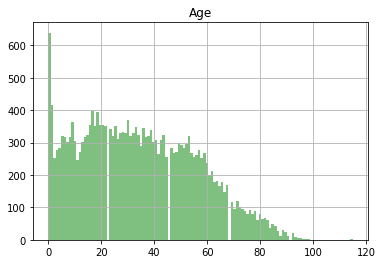

In [44]:
distribuicao[['No-show','Age']].hist(bins=120,alpha=0.5,color='Green')


Conclusão: Podemos perceber, que o maior numero de faltas concentram-se na idade entre 0 e 1 ano de idade 

# **4)** Há alguma relação entre doença e não comparecimento às consultas?

Podemos agrupar os dados levando em consideração as doenças e as faltas, o 1 representa que existe determinada doença, e o 0 é que não, primeiro agruparemos as pessoas que tenham pelos menos uma das doenças definidas na base de dados:

In [8]:
naocomparecimento= distribuicao[ (distribuicao['Hipertension'] == 1) | (distribuicao['Diabetes'] == 1) | (distribuicao['Alcoholism'] == 1) | (distribuicao['Handcap'] == 1) ]




    
    

Em seguida, contamos a quantidade de vezes que as doenças são detectada nas consultas não realizadas 

In [9]:
hipertensao= naocomparecimento['Hipertension'].count() 
diabetes= naocomparecimento['Diabetes'].count()
alcolismo=  naocomparecimento['Alcoholism'].count()
problemacoracao= naocomparecimento['Handcap'].count() 
      

   


Depois, elaboramos um gráfico parar a melhor visualização dos dados referente ás doenças 


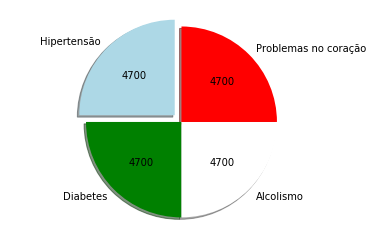

In [10]:
labels = ['Hipertensão', 'Diabetes', 'Alcolismo', 'Problemas no coração']
titulos = [hipertensao, diabetes,alcolismo,problemacoracao]
cores = ['lightblue', 'green', 'white', 'red']
explode = (0.1, 0, 0, 0)  
total = (hipertensao+diabetes+alcolismo+problemacoracao) 

plt.pie(titulos, explode=explode, labels=labels, colors=cores, autopct=lambda p: '{:.0f}'.format(p * total / 100), shadow=True, startangle=90)

plt.axis('equal') 
plt.show()

Conclusão:Podemos perceber, que o numero de faltas por tipo de doença é homogenia, isso pode levar a crer, que os pacientes avaliados podem conter  2 doenças relacionadas entre sí, o que pode acarretar no não comparecimento ás consultas.

# **5)** Qual a cidade com maior número de não comparecimentos?<br>


In [11]:
distribuicao['Neighbourhood'].unique()

#distribuicao['Neighbourhood'].values_counts(normalize=True)
pd.value_counts(distribuicao['Neighbourhood'].values.flatten())

JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     906
CENTRO                          703
JESUS DE NAZARETH               696
JARDIM DA PENHA                 631
CARATOÍRA                       591
TABUAZEIRO                      573
BONFIM                          550
ILHA DO PRÍNCIPE                532
ANDORINHAS                      521
SÃO PEDRO                       515
SANTO ANDRÉ                     508
SANTA MARTHA                    496
SANTO ANTÔNIO                   484
ROMÃO                           474
GURIGICA                        456
JABOUR                          451
DA PENHA                        429
SÃO JOSÉ                        428
MARUÍPE                         424
NOVA PALESTINA                  402
BELA VISTA                      384
SANTOS DUMONT                   369
SÃO CRISTÓVÃO                   363
ILHA DE SANTA MARIA             361
FORTE SÃO JOÃO              

Como podemos ver, o hospital com maior numero de não comparecimentos é o das proximidades do  JARDIM CAMBURI com 1465 não comparecimentos, o JARDIM CAMBURI, está localizado na cidade de Vitória-ES

# **6)** Qual é o mês, dia da semana e dia do mês com maior número de não comparecimentos?

In [ ]:
Primeiro, iremos transformar a coluna AppointmentDay para o tipo datetime  

In [107]:


distribuicao['AppointmentDay']=pd.to_datetime(distribuicao.AppointmentDay)





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Agora, agrupamos o numero de consultas por mês

In [125]:
df.groupby(distribuicao['AppointmentDay'].dt.month).size()


AppointmentDay
4.0      633
5.0    16804
6.0     4882
dtype: int64

Como podemos perceber, o mês 5(MAIO) é o que dispoẽ de maior quantidade de tuplas agrupadas, 
ou seja, ele é o mês com maior numero de faltas. Em seguida, agrupamos os dias do mês 5 
para podemos obter os dados de faltas por dia da semana

In [139]:
dias = distribuicao[distribuicao.AppointmentDay.dt.month==5]
pd.value_counts(dias.AppointmentDay.dt.dayofweek.values.flatten())



1    4336
0    3817
2    3507
4    2599
3    2536
5       9
dtype: int64

In [ ]:
Como podemos observar, o dia da semana  que ocorre maior numero de faltas, é a terça-feira
com 4336 faltas

In [136]:
pd.value_counts(dias.AppointmentDay.dt.day.values.flatten())


16    1049
9     1019
10     992
4      973
17     935
13     905
20     899
19     892
18     890
30     888
11     885
2      861
12     837
3      831
24     811
5      807
6      795
31     767
25     759
14       9
dtype: int64

Podemos observar,que no dia 16 é o dia que ocorre o maior numero de faltas, com 1049 faltas ocorridas no dia.

# **7)** Há alguma correlação entre a participação no programa social Bolsa Família e os comparecimentos?

In [144]:
df.groupby(["Scholarship", "No-show"]).size()



Scholarship  No-show
0            No         79925
             Yes        19741
1            No          8283
             Yes         2578
dtype: int64

In [ ]:
Conclusão: Os participantes do Bolsa Famíla correspondem a 10861, os mesmo em sua grande 
maioria, no total de 8283 não faltam as consultas, o que correspondem a 76% das consultas
realizadas com os participantes do programa.
